Fake length: 13461500
Real length: 12179549


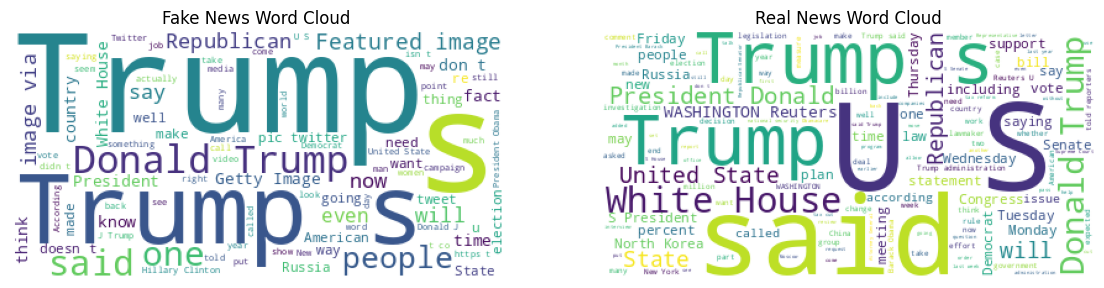

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the correct column name
text_column = 'Text'

# Strip and uppercase labels
df['label'] = df['label'].str.strip().str.upper()

# Generate text
fake_text = ' '.join(df[df['label'] == 'FAKE'][text_column].dropna())
real_text = ' '.join(df[df['label'] == 'REAL'][text_column].dropna())

# Debug
print("Fake length:", len(fake_text))
print("Real length:", len(real_text))

# Plot if safe
if fake_text.strip() and real_text.strip():
    plt.figure(figsize=(14,6))
    plt.subplot(1, 2, 1)
    plt.imshow(WordCloud(max_words=500, background_color='white').generate(fake_text))
    plt.title('Fake News Word Cloud')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(WordCloud(max_words=500, background_color='white').generate(real_text))
    plt.title('Real News Word Cloud')
    plt.axis('off')

    plt.show()
else:
    print("❌ Still empty after fixing — check values manually.")


In [10]:
# Count of punctuation
df['punctuation_count'] = df['Text'].apply(lambda x: sum([1 for char in x if char in string.punctuation]))

# Uppercase word count
df['uppercase_word_count'] = df['Text'].apply(lambda x: sum([1 for word in x.split() if word.isupper()]))

# Word count
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

# Average word length
df['avg_word_length'] = df['Text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

df[['punctuation_count', 'uppercase_word_count', 'word_count', 'avg_word_length']].head()


,punctuation_count,uppercase_word_count,word_count,avg_word_length
0,35,7,279,4.534050
1,17,3,116,5.525862
2,158,13,989,5.219414
3,53,4,364,5.222527
4,68,9,594,5.309764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB
None
label
Fake    5000
Real    4900
Name: count, dtype: int64


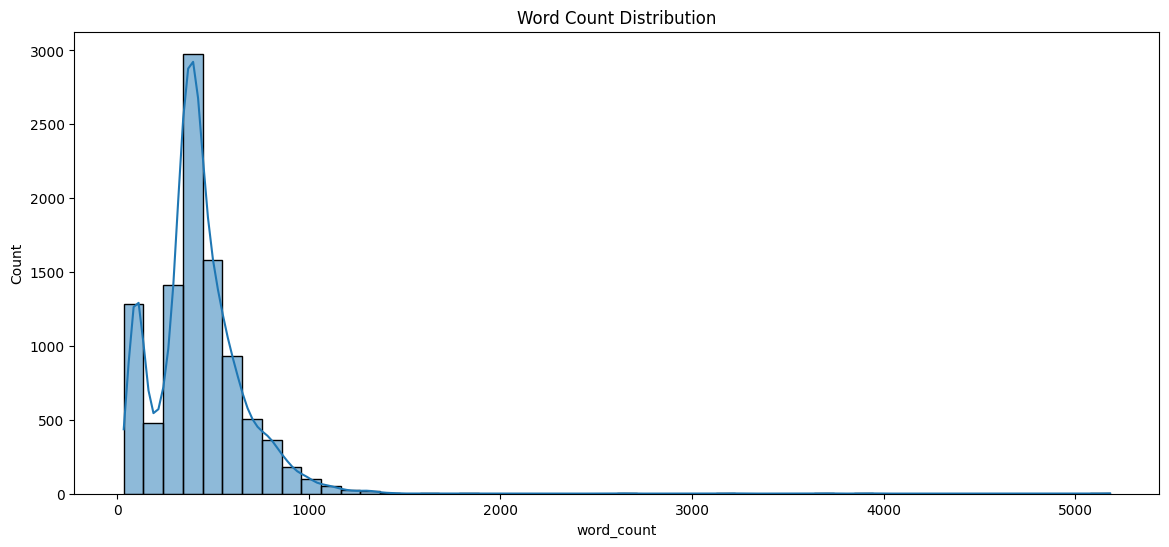

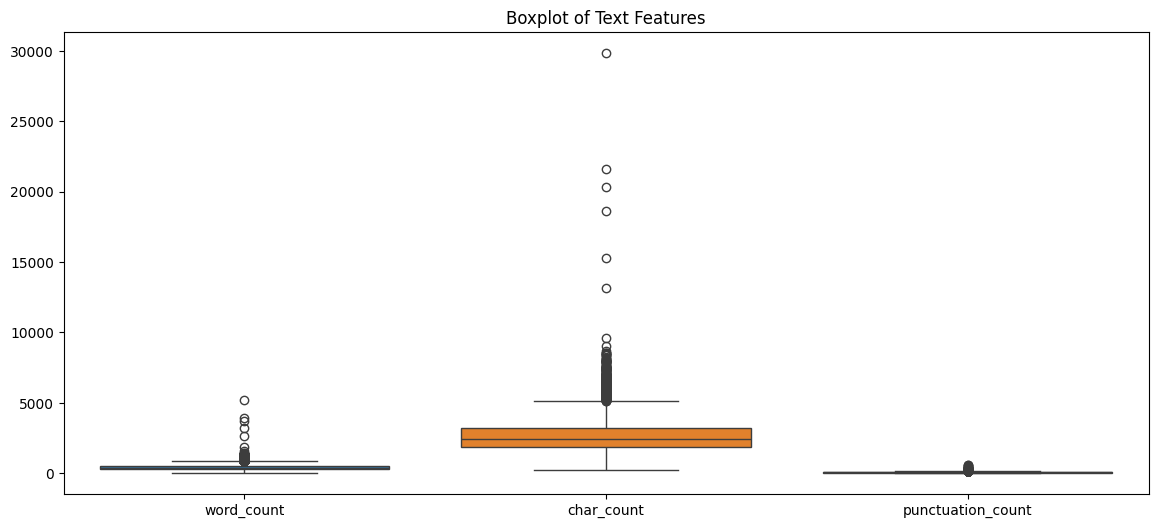

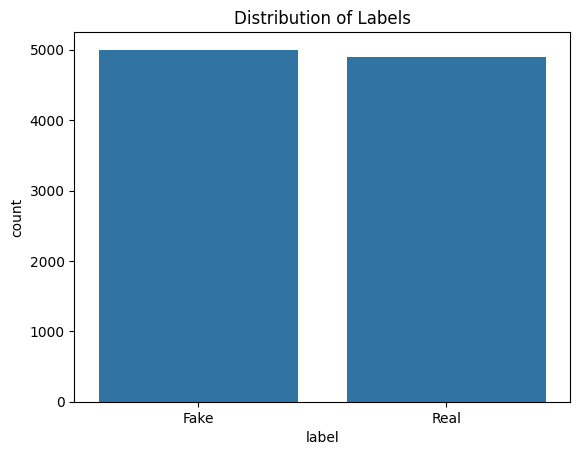

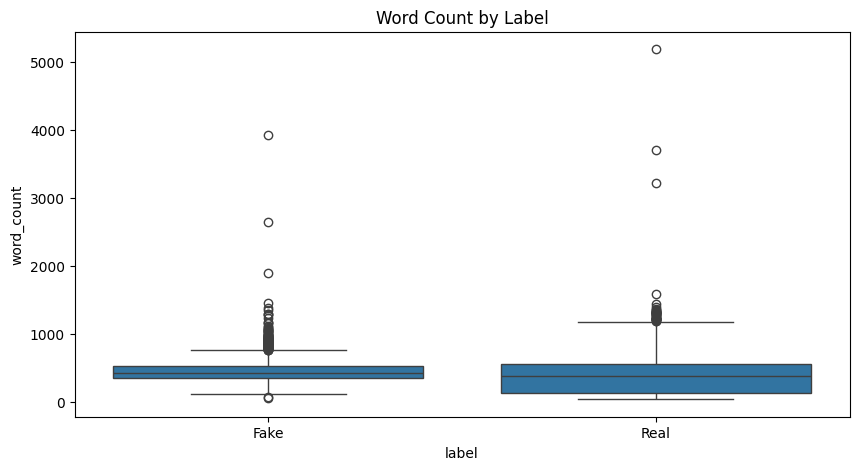

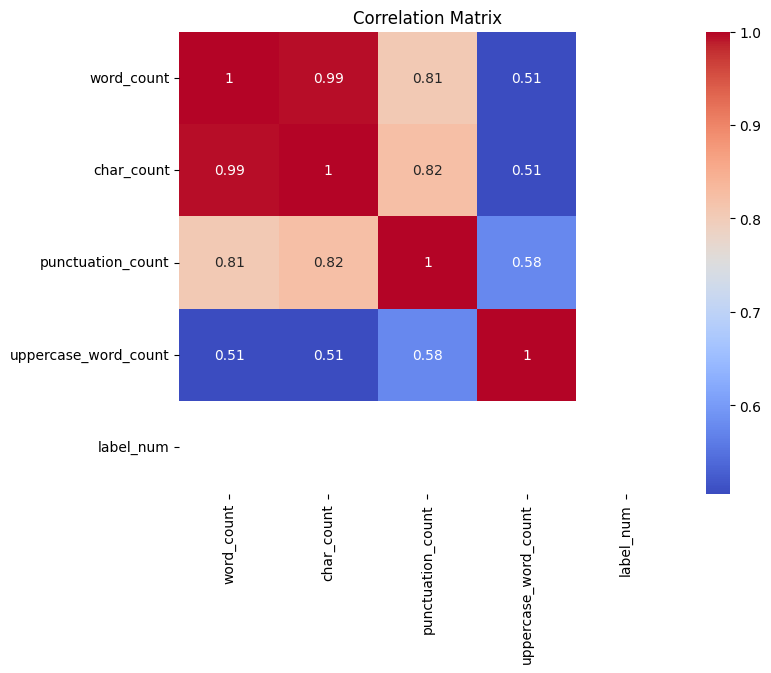

   word_count  char_count  avg_word_length  punct_per_word  caps_per_word
0         279        1545         4.534050        0.125000       0.025000
1         116         758         5.525862        0.145299       0.025641
2         989        6157         5.219414        0.159596       0.013131
3         364        2269         5.222527        0.145205       0.010959
4         594        3748         5.309764        0.114286       0.015126


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import string

# Load Data
df = pd.read_csv('fake_and_real_news.csv')

# Basic Info
print(df.info())
print(df['label'].value_counts())

# -------------------------------
# 📌 UNIVARIATE ANALYSIS
# -------------------------------

# Histogram of word count
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['Text'].apply(lambda x: len(str(x)))
df['punctuation_count'] = df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df['uppercase_word_count'] = df['Text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Plot Histograms
plt.figure(figsize=(14, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Word Count Distribution")
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['word_count', 'char_count', 'punctuation_count']])
plt.title("Boxplot of Text Features")
plt.show()

# Countplot of labels
sns.countplot(data=df, x='label')
plt.title("Distribution of Labels")
plt.show()

# -------------------------------
# 📌 BIVARIATE / MULTIVARIATE
# -------------------------------

# Label vs Word Count
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='word_count', data=df)
plt.title("Word Count by Label")
plt.show()

# Correlation Heatmap
df['label_num'] = df['label'].map({'FAKE': 0, 'REAL': 1})
correlation = df[['word_count', 'char_count', 'punctuation_count', 'uppercase_word_count', 'label_num']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# -------------------------------
# 📌 FEATURE ENGINEERING
# -------------------------------

# Average Word Length
df['avg_word_length'] = df['Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Headline to body ratio (if headline exists)
# Example: assuming a Title column — adapt if not available
# df['headline_to_body_ratio'] = df['Title'].apply(lambda x: len(str(x))) / df['Text'].apply(lambda x: len(str(x)))

# Ratio features
df['punct_per_word'] = df['punctuation_count'] / (df['word_count'] + 1)
df['caps_per_word'] = df['uppercase_word_count'] / (df['word_count'] + 1)

# Show new features
print(df[['word_count', 'char_count', 'avg_word_length', 'punct_per_word', 'caps_per_word']].head())

# -------------------------------
# 📌 INSIGHT SUMMARY (add this in report)
# -------------------------------

'''
Key EDA Observations:
- Fake news tends to have more uppercase words and punctuation.
- Real news has slightly more average word count per article.
- Word clouds show similar topics (Trump, US), but different tone.
- Correlation shows word/char count strongly related.

Feature Engineering Justification:
- Word count, punctuation count, caps are strong text indicators.
- avg_word_length can hint writing style differences.
- punct_per_word ratio adds more nuance than raw punctuation count.
'''

# Save processed data (optional)
df.to_csv('processed_news.csv', index=False)
